In [44]:
#%pip install -r requirements.txt

import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('../data/photos_v1/photos_135.csv')

In [46]:
image_row = df.iloc[0, 1:].values

# Reshape the flattened row into a 2D array (for a 224x224 image)
image_reshaped = image_row.reshape(256, 256)

In [47]:
# converr to float
image_reshaped = image_reshaped.astype(float)

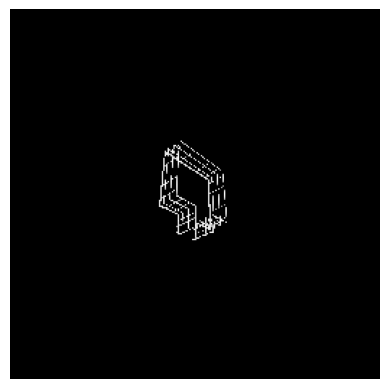

In [48]:
#df = pd.DataFrame([[int(128)] * (256 * 256)])  # Example row with pixel values between 0 and 255


# Render the image using matplotlib
plt.imshow(image_reshaped, cmap='gray')  # Set vmin and vmax to handle the full 0-255 range
plt.axis('off')  # Optionally turn off the axis
plt.show()

In [49]:
df.head()

,mesh_3049_0_0,0,0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9,...,0.64956,0.64957,0.64958,0.64959,0.64960,0.64961,0.64962,0.64963,0.64964,0.64965
0,mesh_3049_0_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mesh_3049_0_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,mesh_3049_0_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,mesh_3049_0_4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,mesh_3049_0_5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd


# Convert the 2D array to a PyTorch tensor and add a channel dimension (1 channel for grayscale)
image_tensor = torch.tensor(image_reshaped, dtype=torch.float32).unsqueeze(0)  # Shape: (1, 256, 256)

# Define the transformation: Center crop to 224x224 and normalize
preprocess = transforms.Compose([
    transforms.CenterCrop(224),  # Crop from 256x256 to 224x224
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # Duplicate the grayscale channel to get 3 channels (RGB-like)
    transforms.Normalize(mean=[0.485] * 3, std=[0.229] * 3)  # Normalize based on ImageNet stats
])

# Apply the preprocessing
input_tensor = preprocess(image_tensor)

# Add batch dimension
input_tensor = input_tensor.unsqueeze(0)  # Shape: (1, 3, 224, 224)

# Load a pre-trained model (ResNet50)
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model.eval()

# Run the model
with torch.no_grad():
    output = model(input_tensor)

print(output.shape)  # Output: (1, 1000) for 1000 ImageNet classes

# test for the first 5 classes
_, indices = torch.topk(output, 5)
print(indices)


Using cache found in /home/edudaluna/.cache/torch/hub/pytorch_vision_v0.10.0


torch.Size([1, 1000])
tensor([[644, 530, 711, 619, 818]])
